In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import os
from submesh import io
import re
import sim_validation as sv

In [2]:
# Load sim data
elev_ds = io.read_fort63_nc('/Users/crj85568/Projects/KingsBay/data/ga_tides_010125/fort.63.nc')
vel_ds = io.read_fort63_nc('/Users/crj85568/Projects/KingsBay/data/ga_tides_010125/fort.64.nc')

comparison = {
    'currents': {
        'kb0102': {'depth': 3.4},
        'kb0401': {'depth': 3.4},
        'kb0601': {'depth': 2.9},
        'kb0201': {'depth': 3.4},
        'kb0301': {'depth': 3.4}
    },
    'water_level': {
        '8679598': {}  # You can add metadata here if needed
    }
}


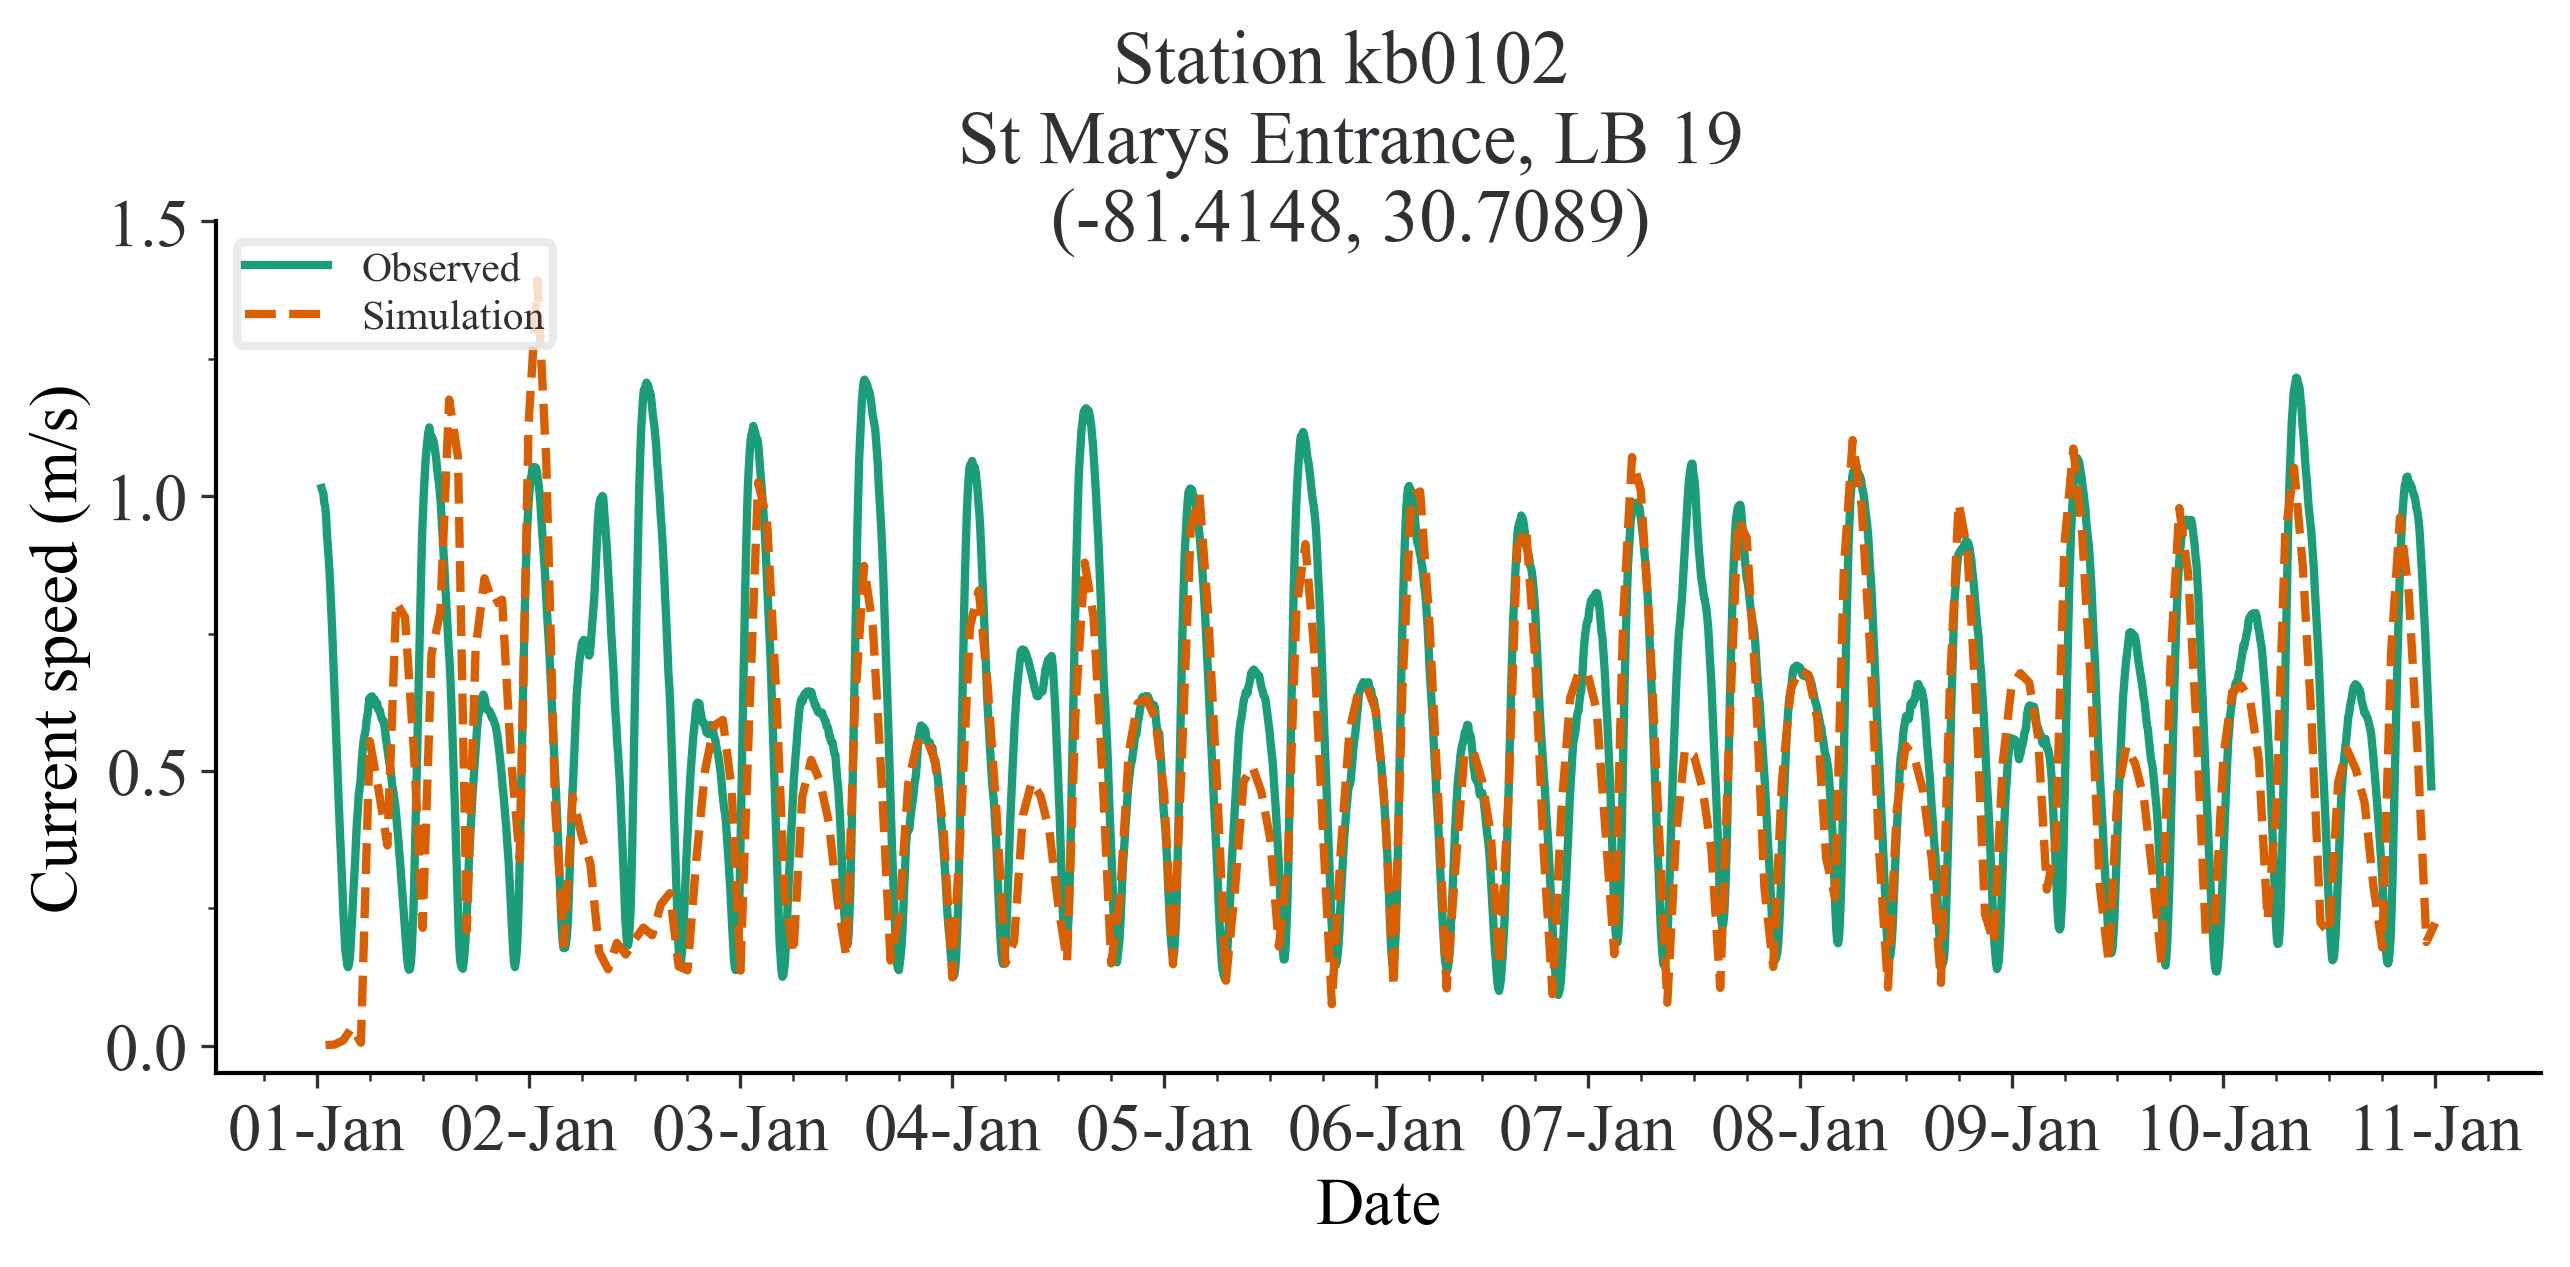

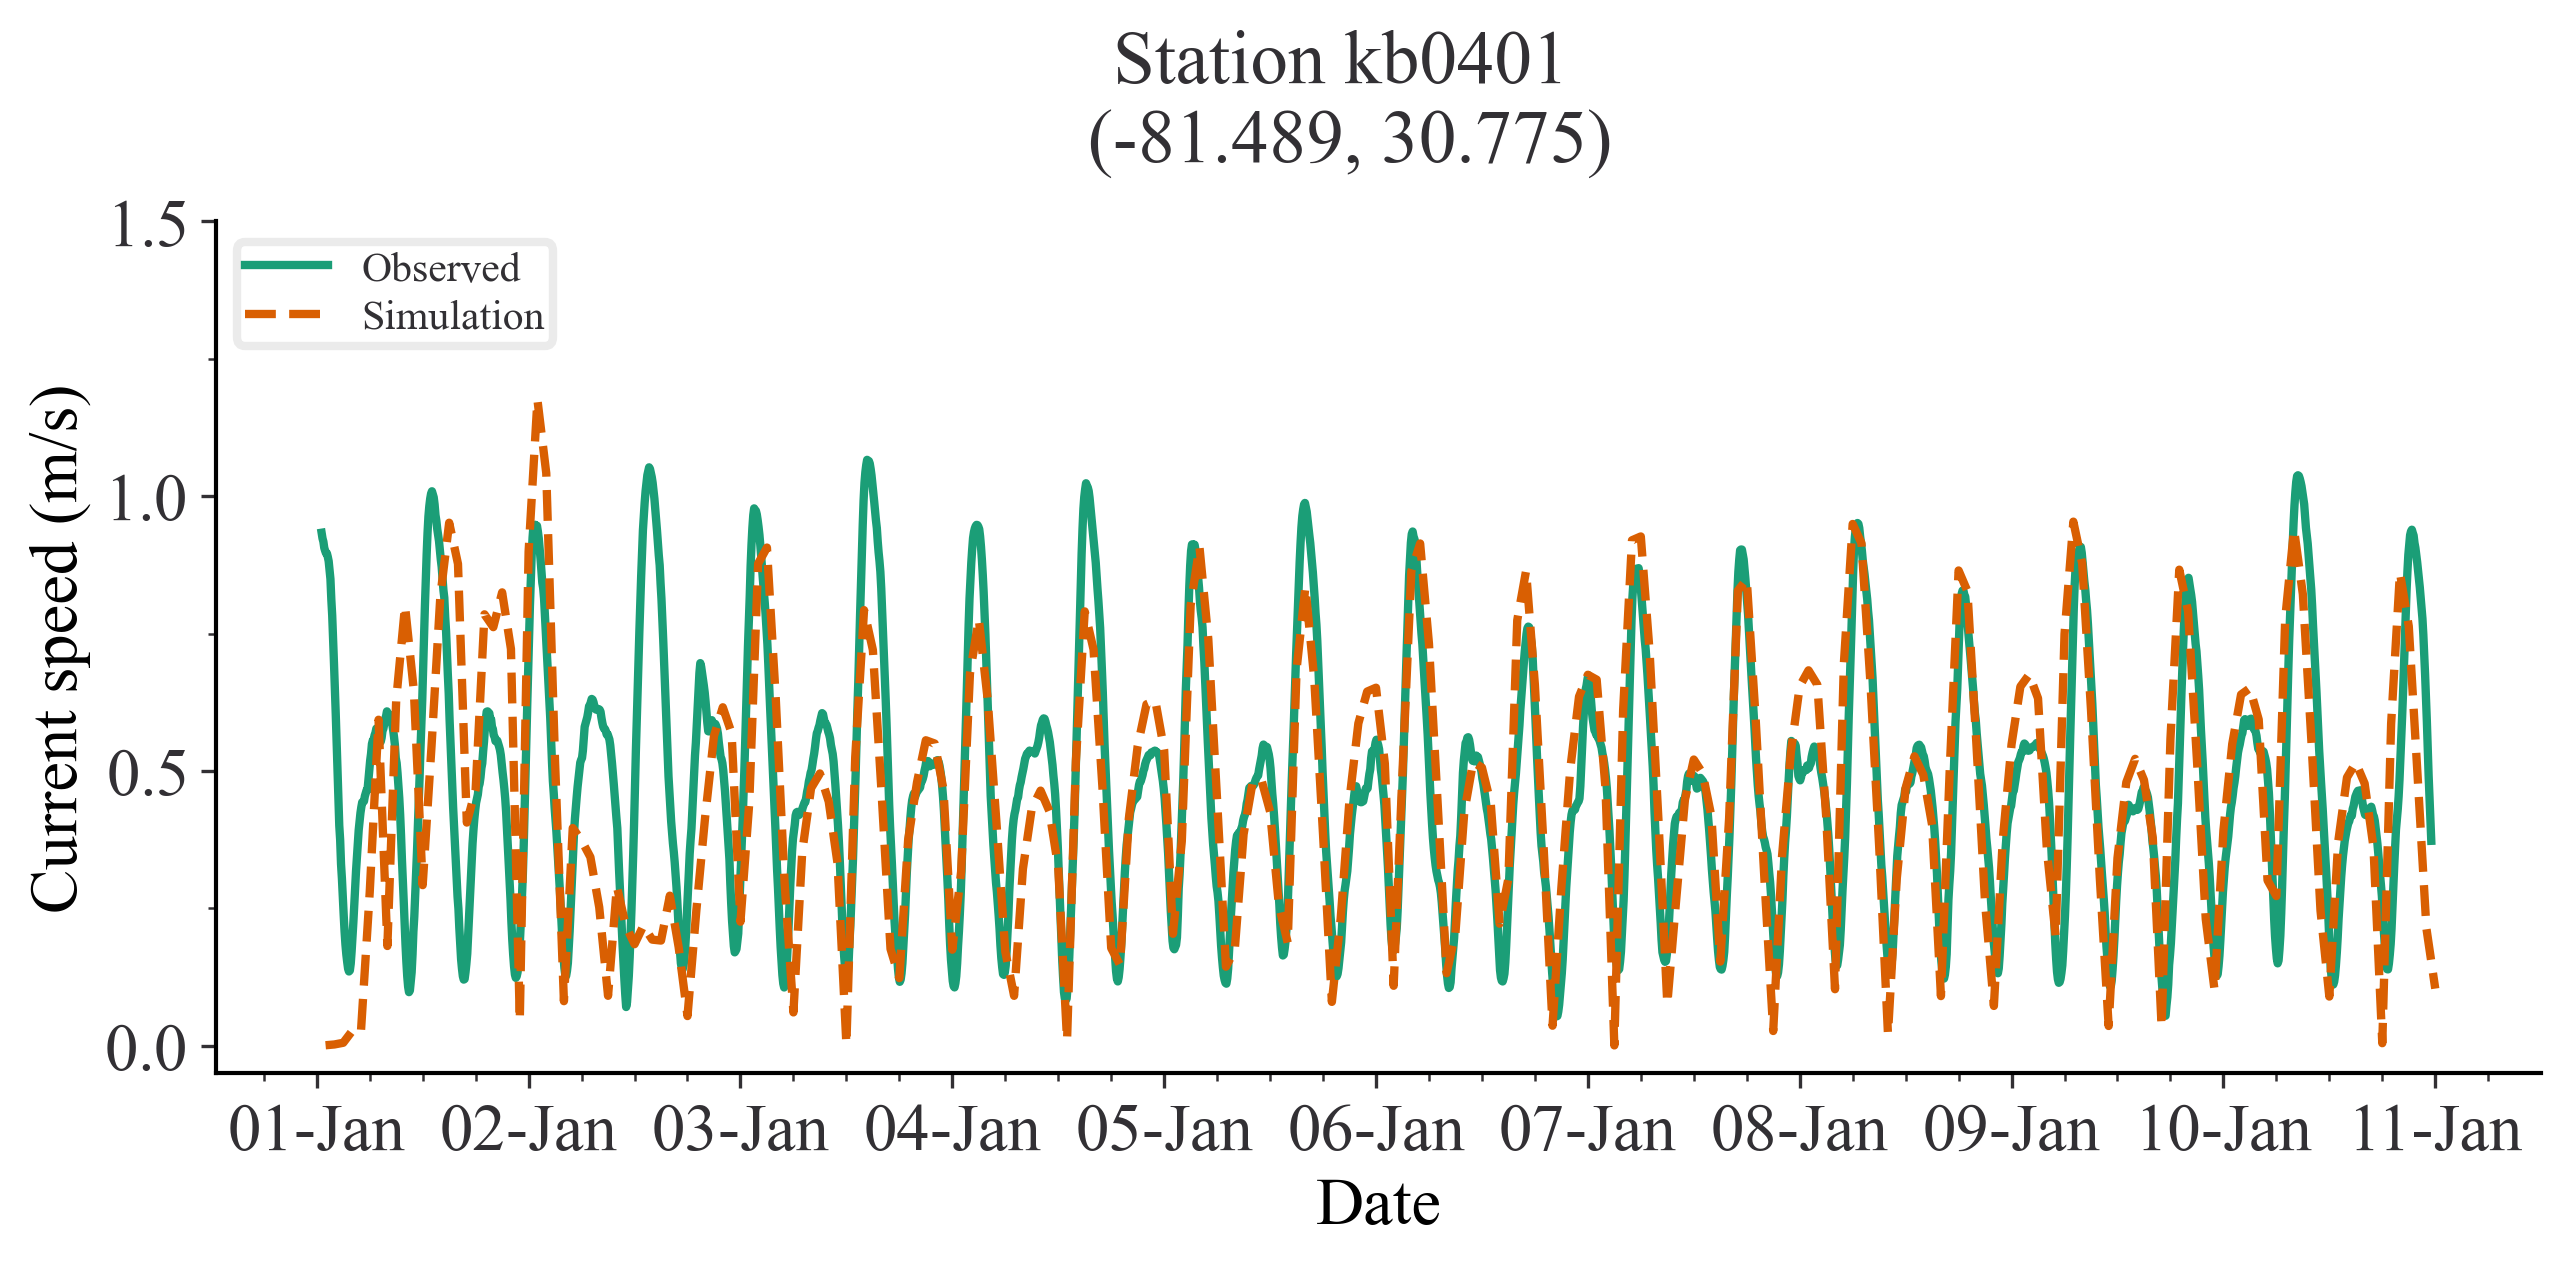

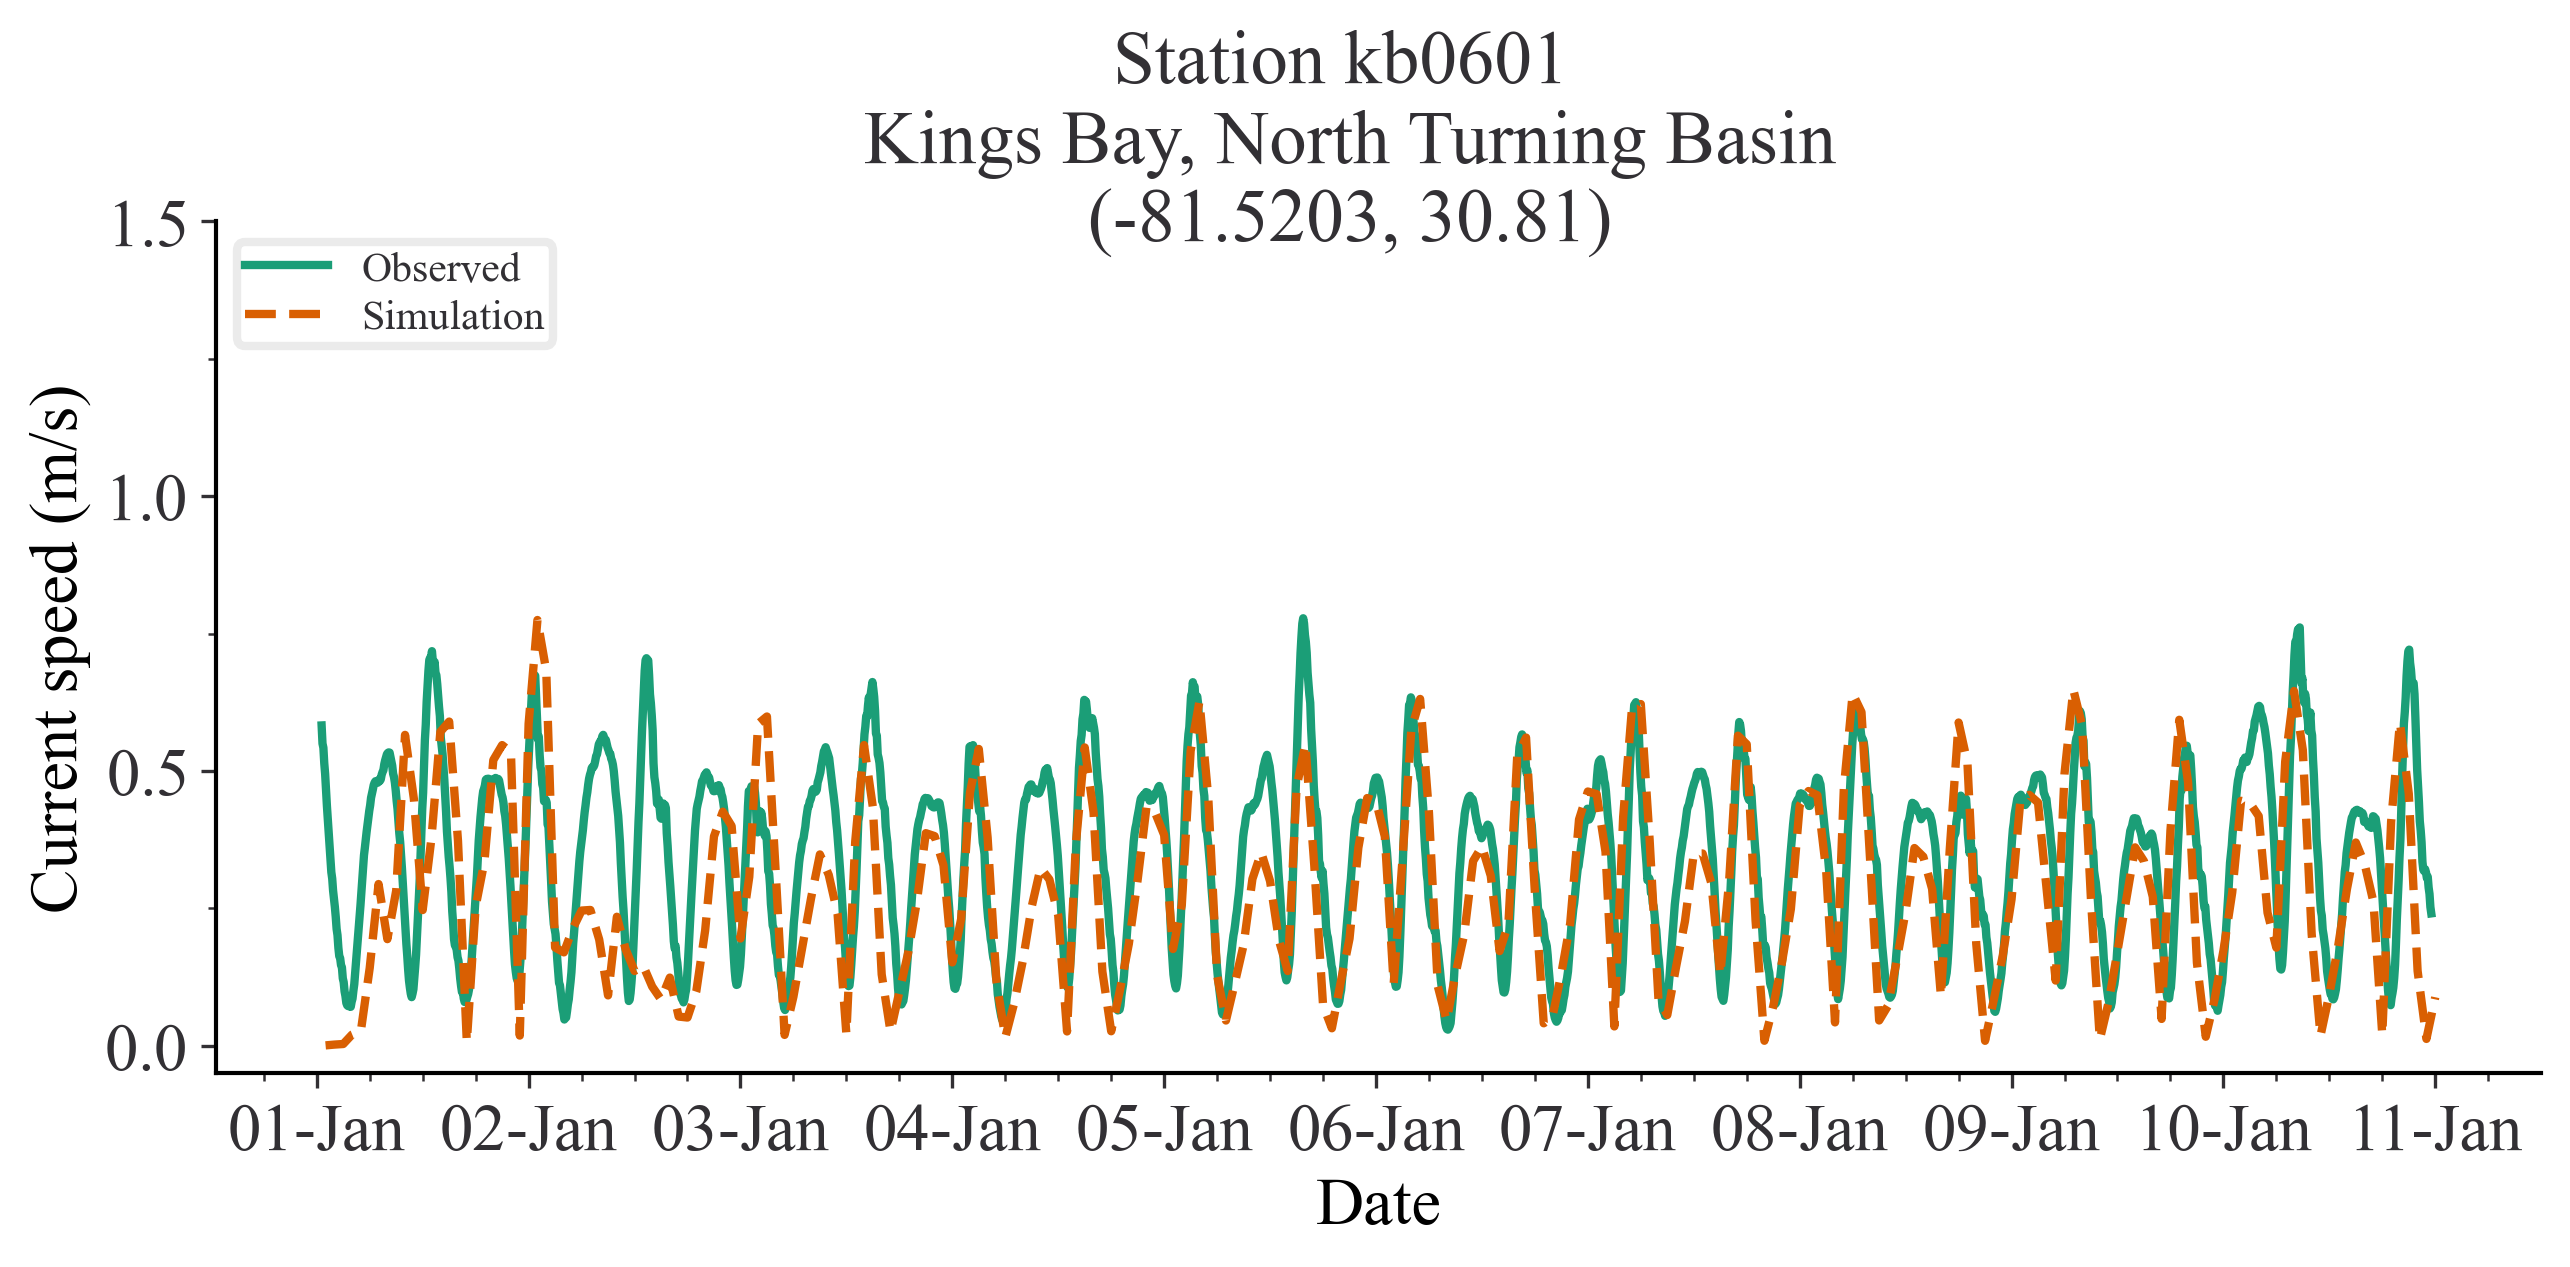

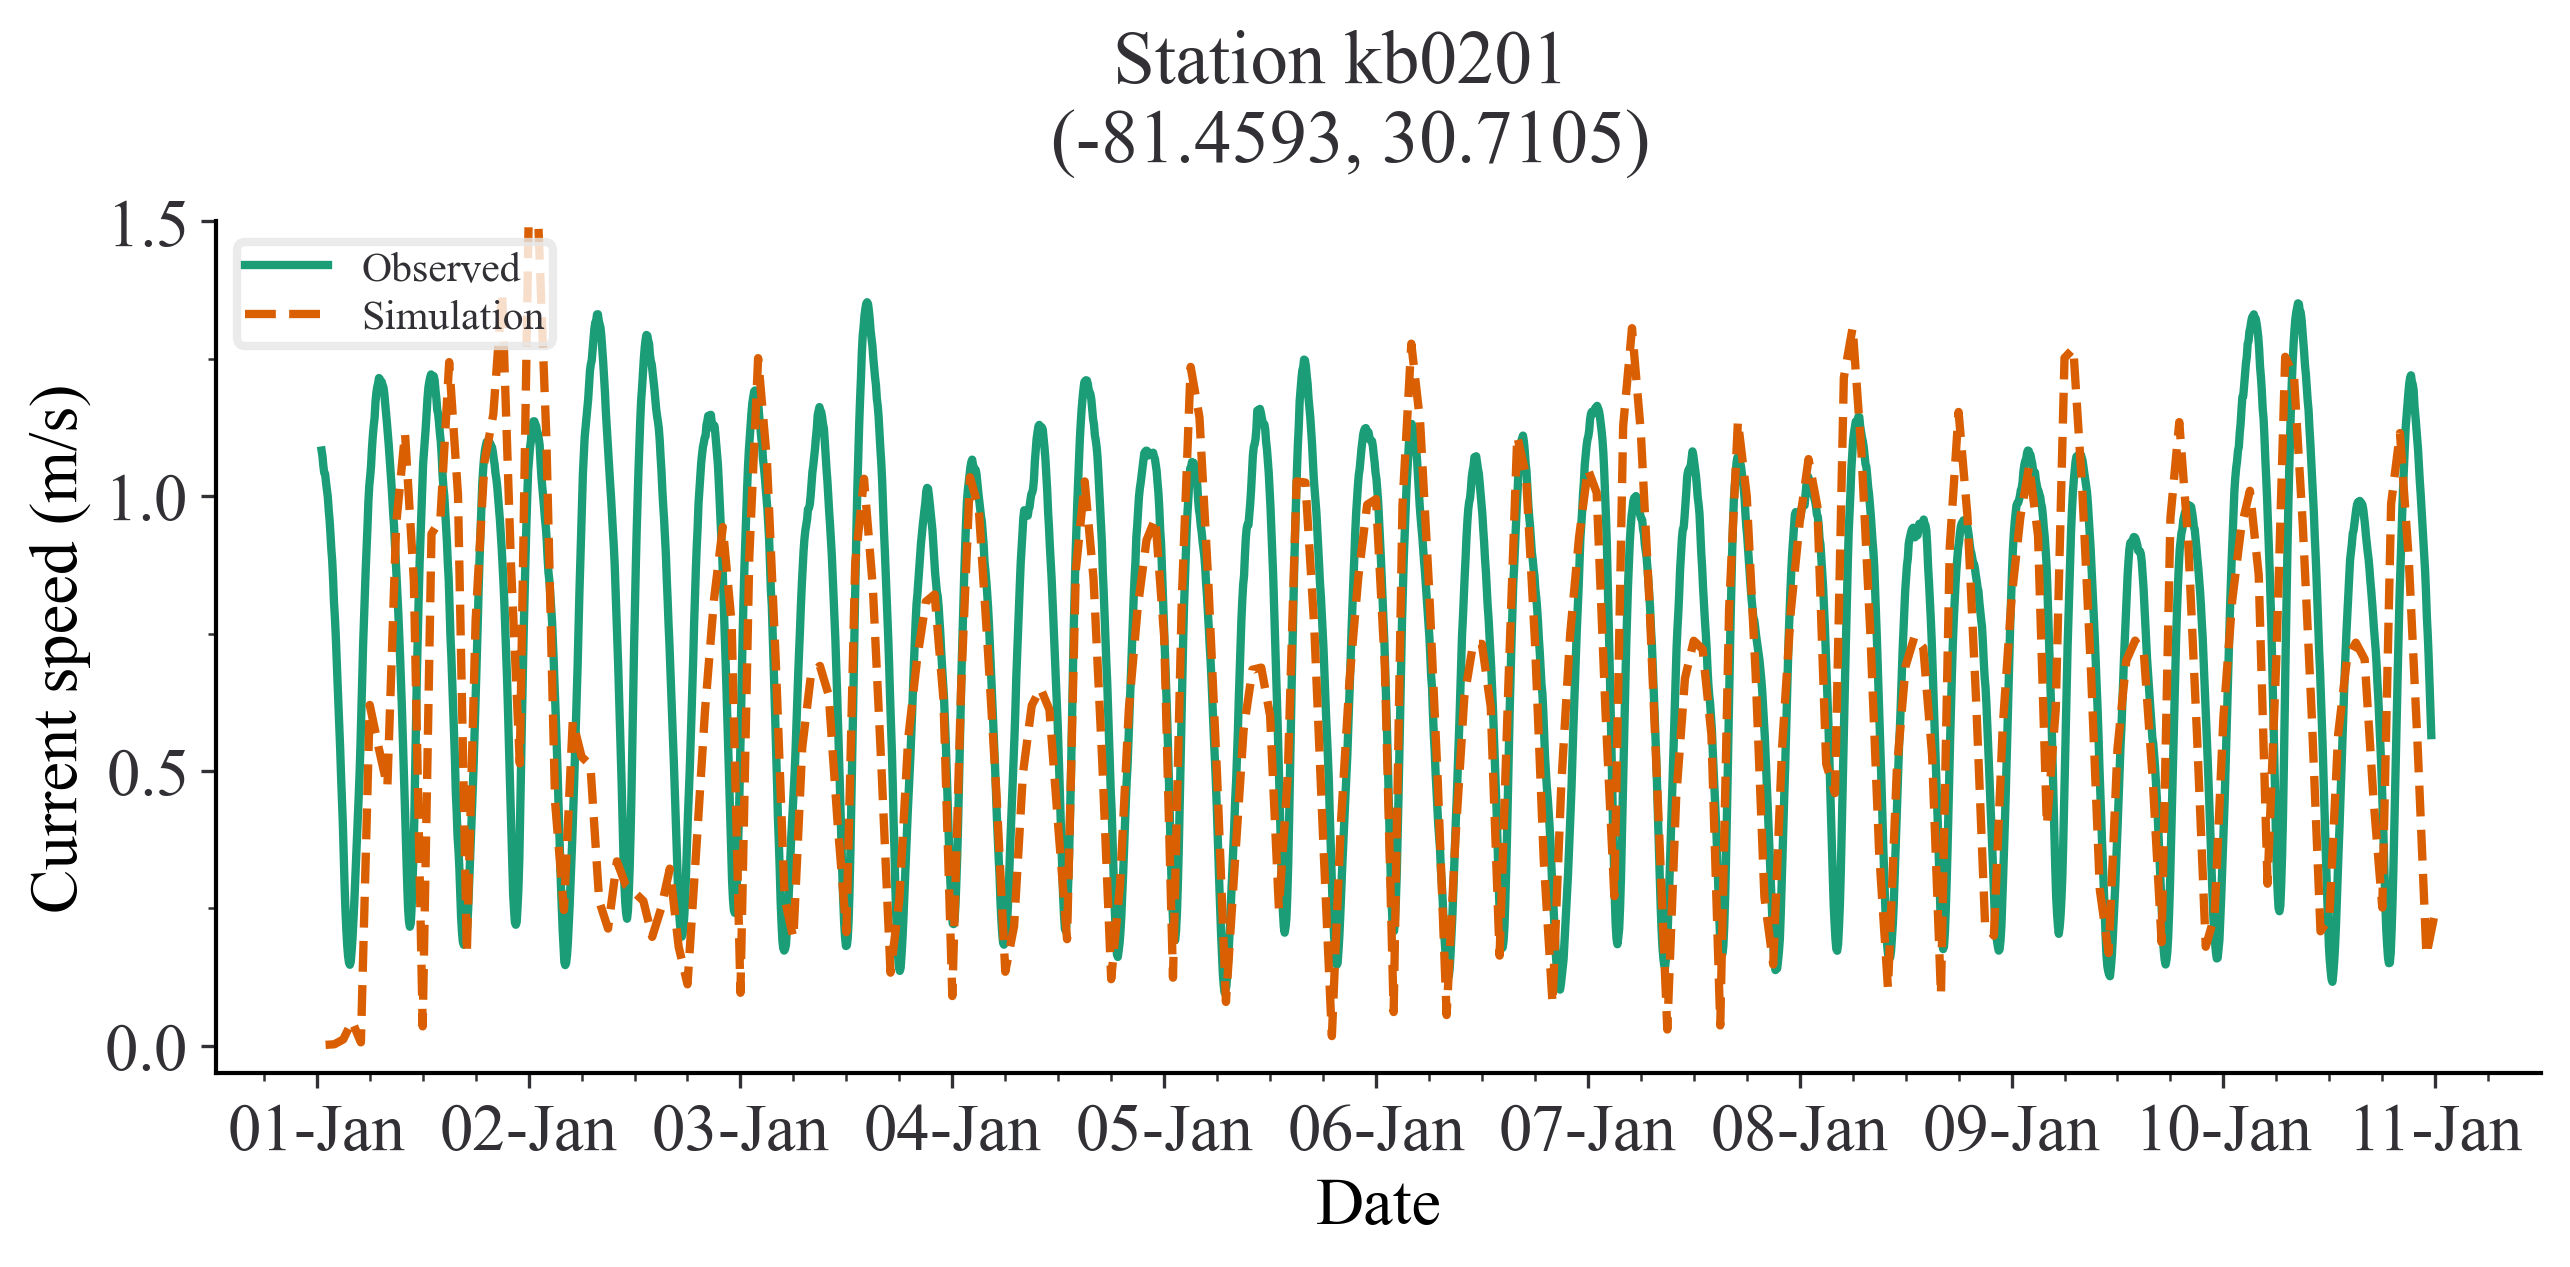

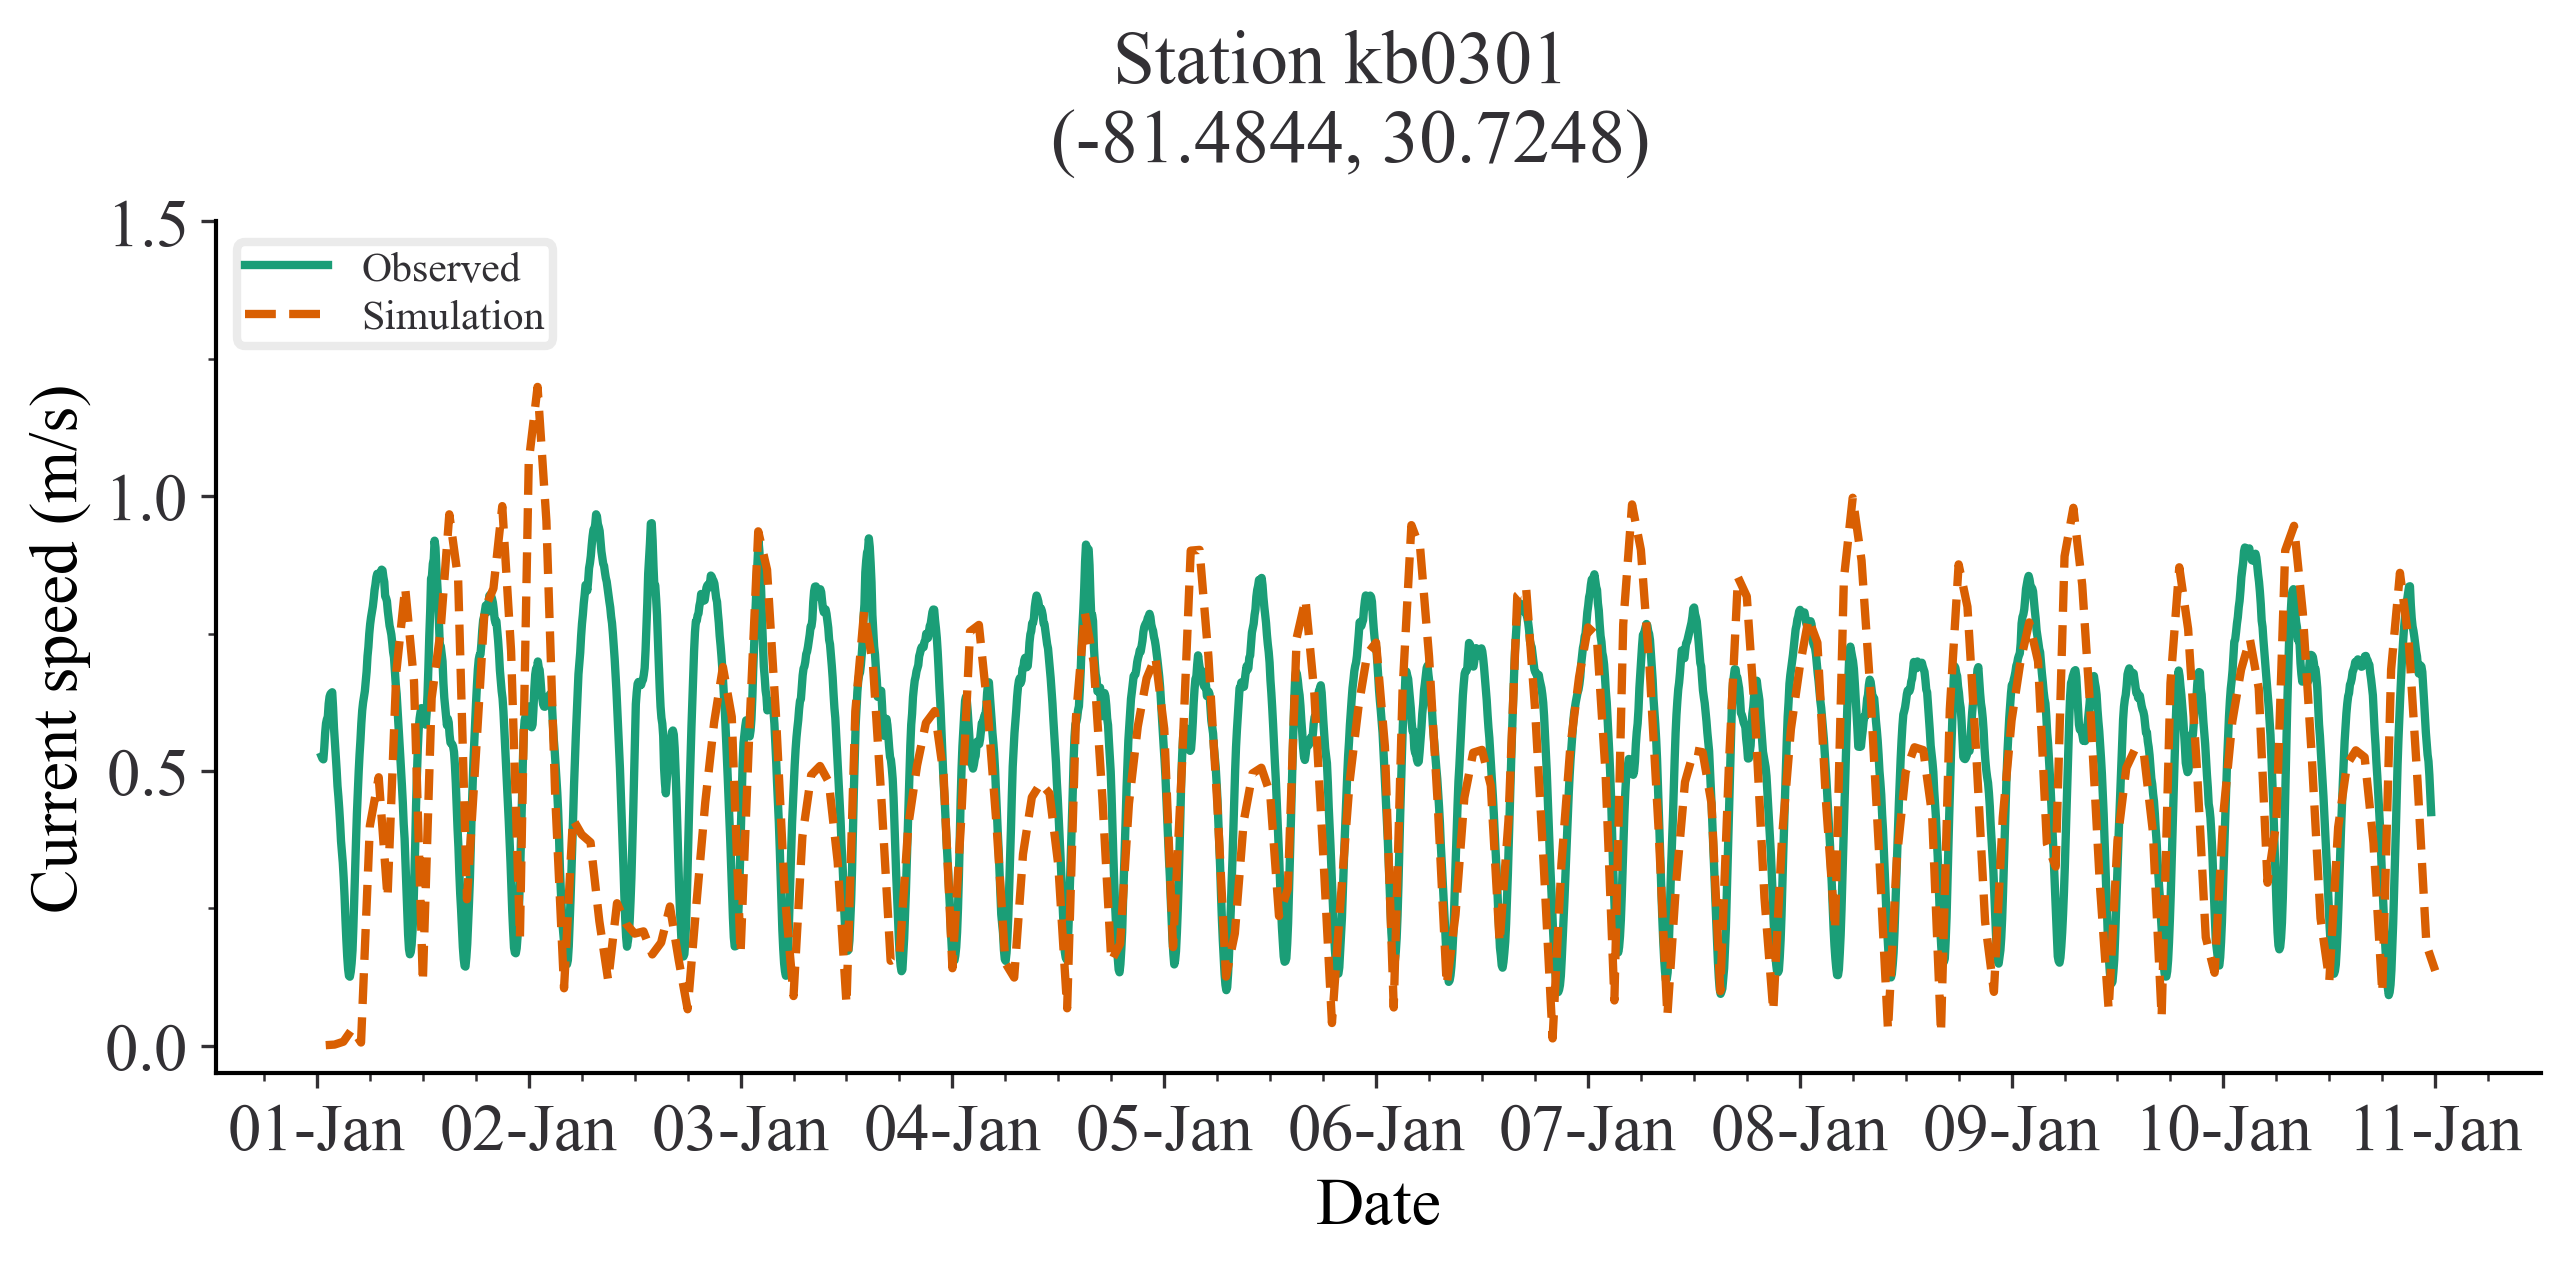

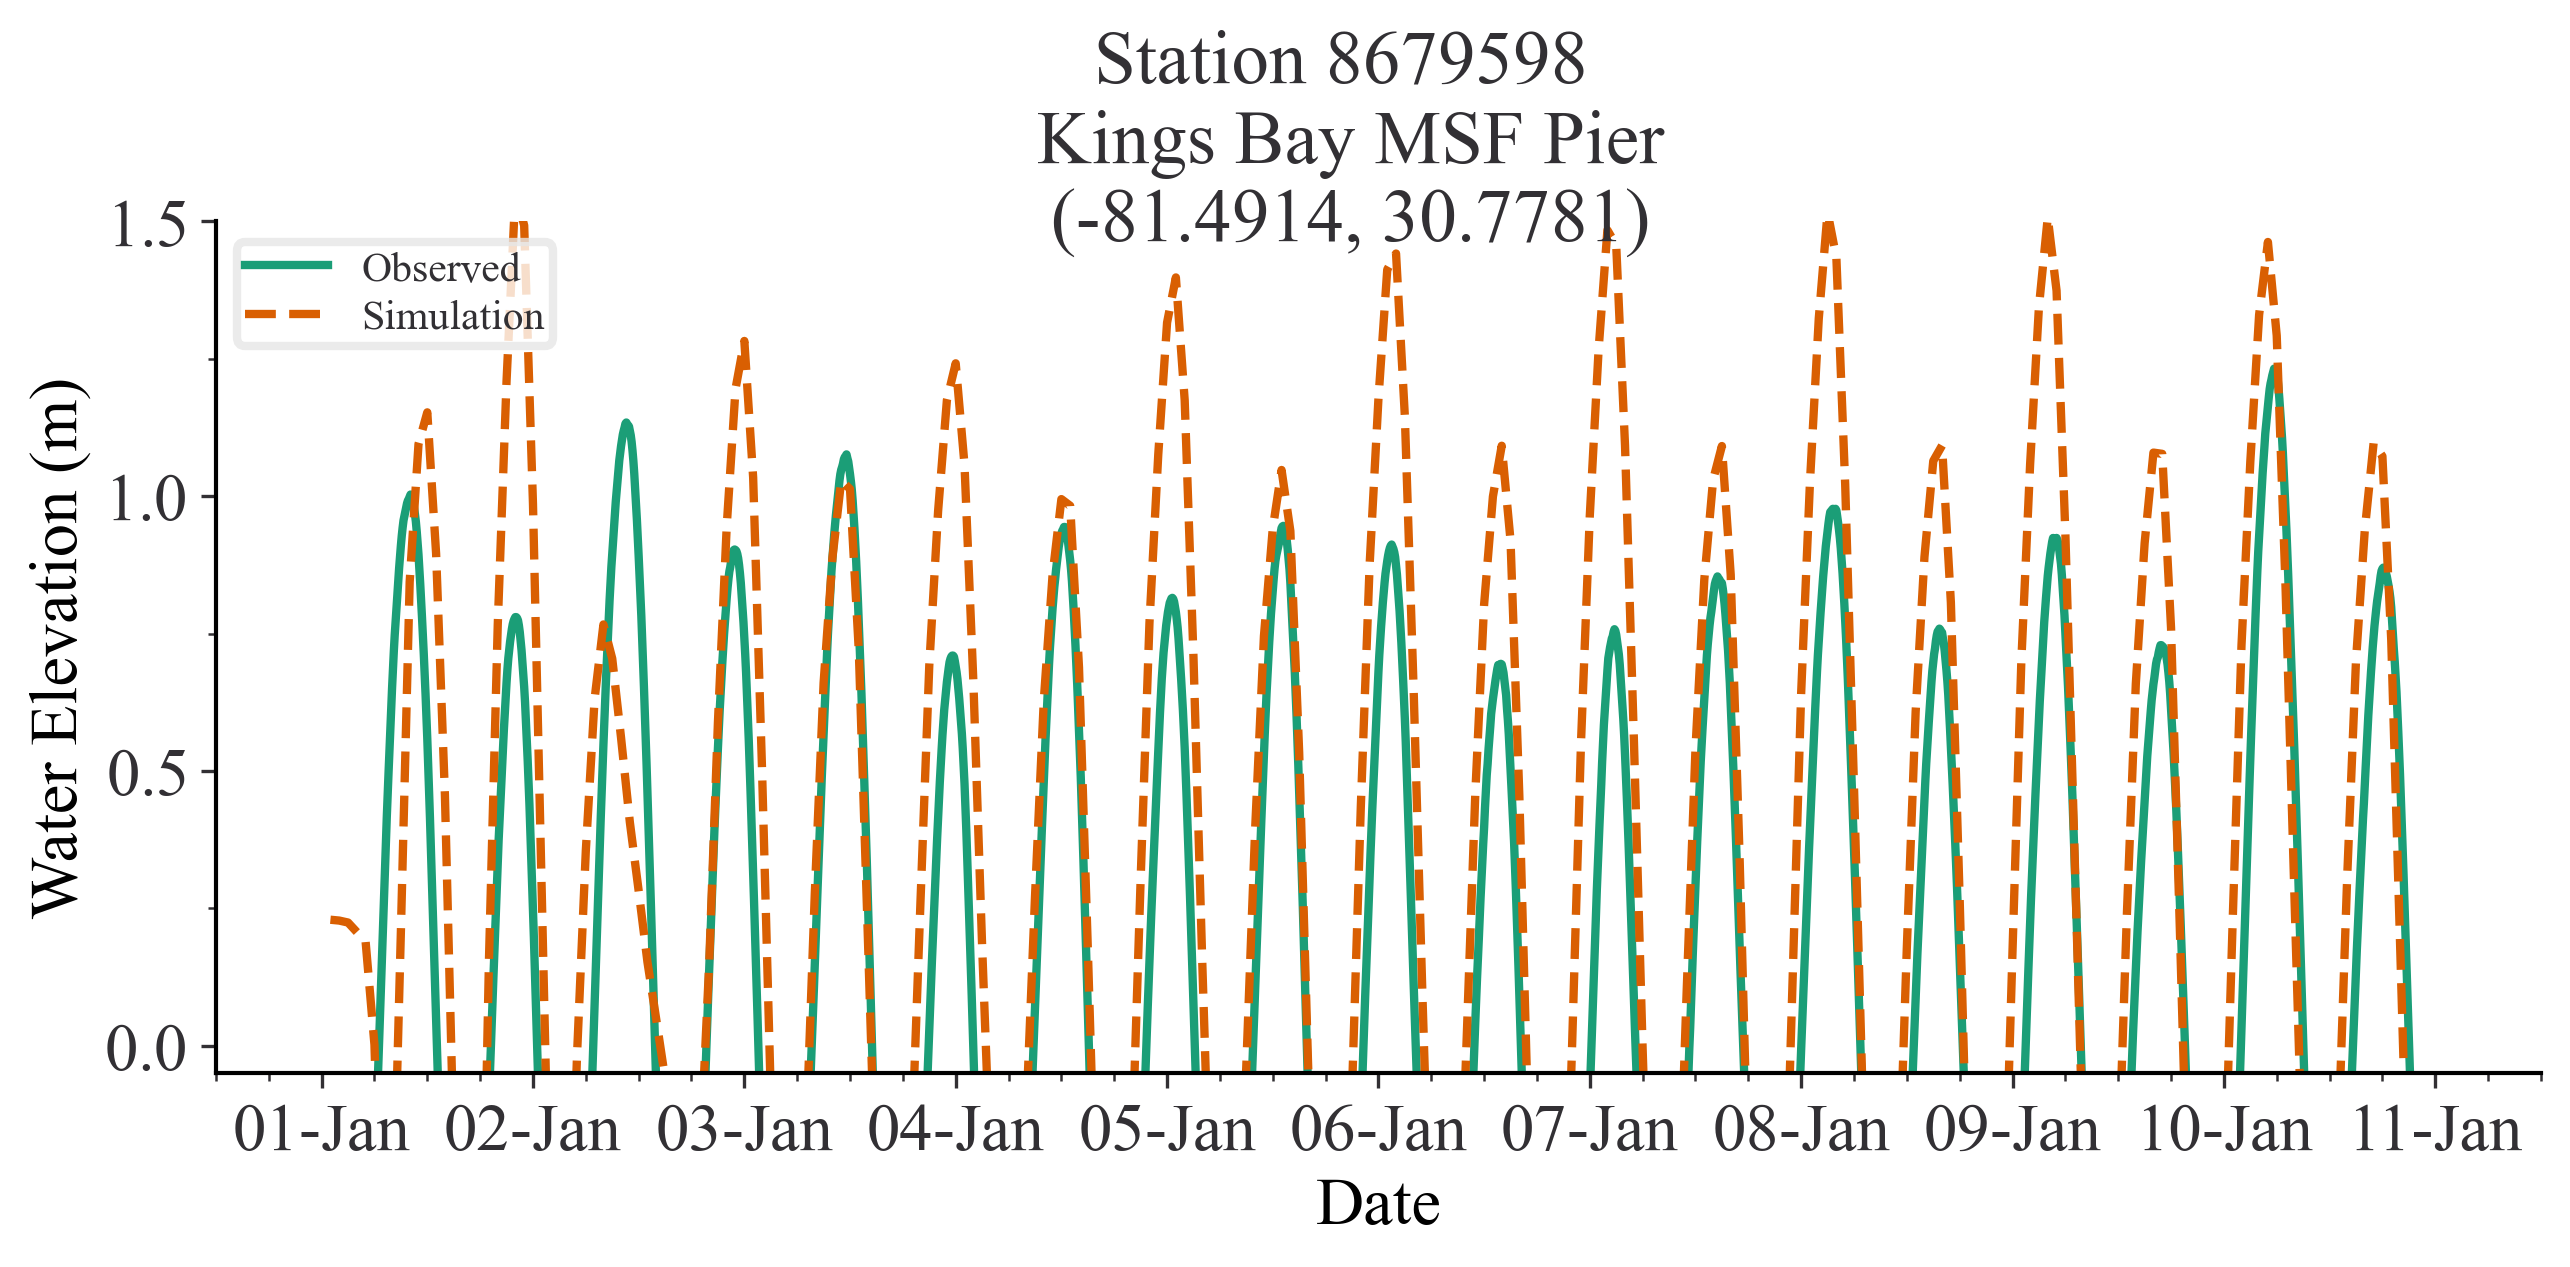

In [3]:
for product in comparison:
    if product == 'currents':
        cols = ['u-vel', 'v-vel']
        ds = vel_ds
    else:
        cols = 'zeta'
        ds = elev_ds
    begin_date = '20250101'
    end_date = '20250110'
    datum = 'MSL'
    time_zone = 'LST'
    for station in comparison[product]:
        noaa_data, meta = sv.fetch_noaa_data(station, begin_date, end_date, product)
        sim_data = sv.select_simulation_data(ds, meta, cols)
        sv.compare_obs_sim(noaa_data, sim_data, meta, product)